### Explore X chromosome SNPs
### E Flynn
### 1/17/2018


The goal of this is to examine X chromosome SNPs - and the effect that inactivation vs. escape from inactivation has on the beta and SE estimates from GWAS. 

If we run plink with model of no/escape from inactivation, for the x-chromosome, the doses of the following genotypes are:
   females: dd=0, dD=B, DD=2B
   males: d=0, D=B
(the inactivation would have females: dd=0, dD=B/2, DD=B).

As a result, if we ran the no inactivation model, and there was inactivation, this would lead to having a \beta_f estimated lower than the \beta_m. In the case there is no inactivation, the \betas should be equal. I am not sure how this effects the standard errors, but I also think that the standard errors will be affected by the fact that in males, there are only two possible genotypes, while in females there are three and this affects ability to estimate dose of a "D"?

I was playing around a bit with the x chromosome model we discussed ((0) null, (1) inactivation, and (2) escape components, where the inactivation and escape components are distinguished by either (1) equal \sigma^2_f and \sigma^2_m, or (2) unequal \sigma^2_f and \sigma^2_m. This did not quite make sense to me, and I wasn't sure if we would really see differences in the variances, so I looked at some data.

Here - I examine height x chromosome data, and I look at SNPs in genes that undergo inactivation in females vs. a gene that is thought to escape inactivation in females across multiple tissues. I expected to see differences in the estimated Betas and standard errors in females vs. in males, but I did not see any differences. I looked at several other genes and saw no striking differences. 
I want to find data on SNPs in these genes that have been conclusively shown to follow either model, and then work with this to do more exploratory analysis.

I think a better way to do this may be to run both models for each SNP and select which fits the data better?


In [1]:

dat.f <- read.table("../xchr/ukb24893_v2.50.zerosex.PHENO1_cX.glm.linear.gz")
dat.m <- read.table("../xchr/ukb24893_v2.50.onesex.PHENO1_cX.glm.linear.gz")

In [2]:
dat.f <- dat.f[dat.f$V6=="ADD",]
dat.m <- dat.m[dat.m$V6=="ADD",]

col.labels <- c("CHROM", "POS", "ID", "REF", "ALT1", "TEST", "OBS_CT", 
        "BETA", "SE", "T_STAT", "P")
colnames(dat.f) <- col.labels
colnames(dat.m) <- col.labels



Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).

Loading required package: MASS
Loading required package: Matrix
Loading required package: mnormt
Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


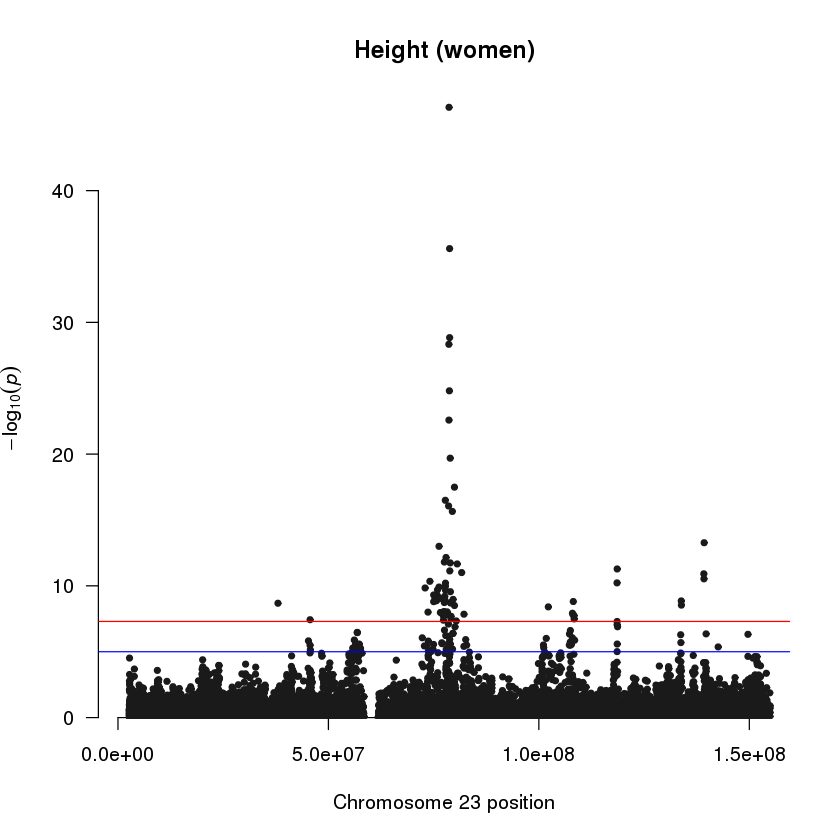

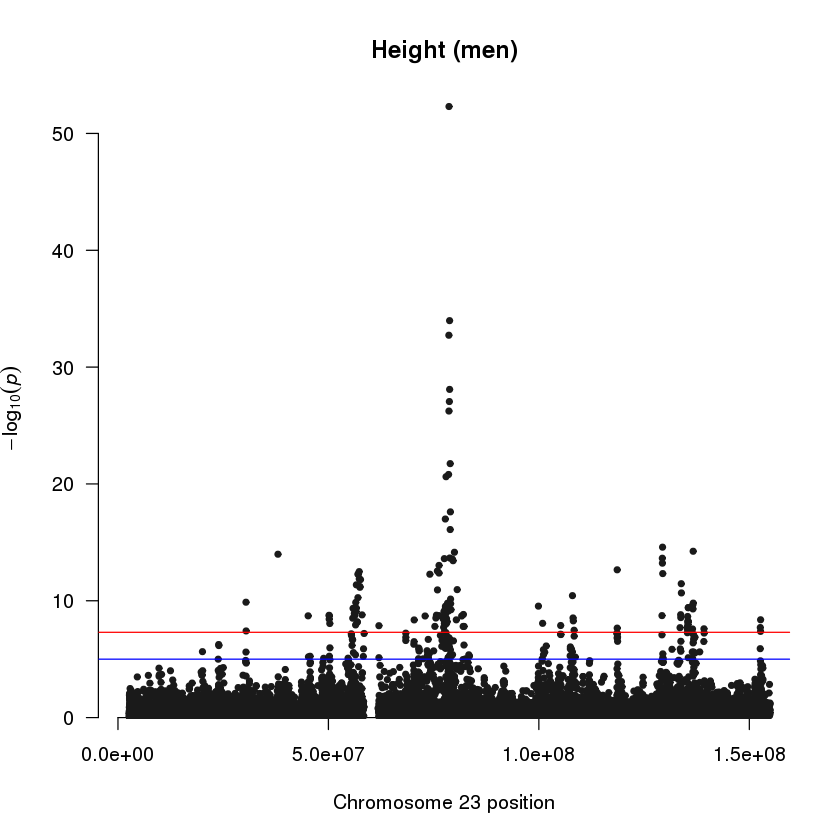

In [3]:
require('qqman')
source("../model_utils.R")
filt.dat <- filtUkbDat(dat.f, dat.m)

all.dat.f <- filt.dat$`1`
all.dat.m <- filt.dat$`2`
colnames(all.dat.f)[1:3] <- c("CHR", "BP", "SNP")
colnames(all.dat.m)[1:3] <- c("CHR", "BP", "SNP")
all.dat.f$CHR <- 23
all.dat.m$CHR <- 23
manhattan(all.dat.f, main="Height (women)")
manhattan(all.dat.m, main="Height (men)")

In [4]:
sig.f <- all.dat.f[all.dat.f$P < 10^-8,]
sig.m <- all.dat.m[all.dat.m$P < 10^-8,]

In [5]:
source("../snp_utils.R")
sig.f.annot <- annotateSNP(sig.f)
sig.m.annot <- annotateSNP(sig.m)

In [6]:
f.annot <- annotateSNP(all.dat.f)
m.annot <- annotateSNP(all.dat.m)

In [7]:
unique(sig.f.annot$gene)[order(unique(sig.f.annot$gene))]

[1] "BRWD3"     "CHIC1"     "CYSLTR1"   "FAM46D"    "GPR174"    "ITM2A"    
 [7] "KIAA2022"  "LOC389895" "MAGEE1"    "MAGEE2"    "MIR325"    "P2RY10"   
[13] "PBDC1"     "PGK1"      "PLAC1"     "SH3BGRL"   "SLC16A2"   "SLC25A43" 
[19] "SLC25A5"   "SRPX"      "TBX22"     "ZCCHC5"    NA

In [8]:
unique(sig.m.annot$gene)[order(unique(sig.m.annot$gene))]

[1] "ARMCX2"    "ATP7A"     "BRWD3"     "CHIC1"     "CXorf21"   "CYSLTR1"  
 [7] "ELF4"      "FAAH2"     "FAM46D"    "GPR112"    "GPR174"    "HMGN5"    
[13] "IRS4"      "ITM2A"     "KIAA2022"  "LINC00629" "LOC550643" "LPAR4"    
[19] "MAGEE1"    "MAP7D3"    "MIR325"    "NLGN3"     "P2RY10"    "PLAC1"    
[25] "RAB33A"    "RRAGB"     "SH3BGRL"   "SHROOM4"   "SLC25A5"   "SPIN3"    
[31] "SRPX"      "TBX22"     "TSPAN6"    "UBQLN2"    "ZCCHC5"    "ZFP92"    
[37] "ZIC3"      "ZNF280C"   "ZXDB"      NA

In [9]:
# inactivation - almost the same, but v slightly higher standard errors for f
merge(f.annot[f.annot$gene %in% c("XIST"),], m.annot[m.annot$gene %in% c("XIST"),], 
      by="SNP")[,c("SNP", "BETA.x", "BETA.y", "SE.x", "SE.y", "P.x", "P.y")]

SNP,BETA.x,BETA.y,SE.x,SE.y,P.x,P.y
rs181200246,-0.003376440,-0.001939400,0.00843402,0.00603165,0.688909,0.747803
rs195678,-0.005489610,0.000275457,0.00461288,0.00327294,0.234024,0.932928
rs41303699,0.005650350,0.004671340,0.01135200,0.00810616,0.618668,0.564433
rs6528,0.000617624,-0.002012570,0.00892832,0.00635774,0.944850,0.751582
rs7888812,0.008932740,0.007699970,0.00767697,0.00542123,0.244598,0.155512


In [10]:
# Examine inactivation in a gene that has significant SNPs
# almost the same, but v slightly higher standard errors for f
merge(f.annot[f.annot$gene %in% c("CYSLTR1"),], m.annot[m.annot$gene %in% c("CYSLTR1"),], 
      by="SNP")[,c("SNP", "BETA.x", "BETA.y", "SE.x", "SE.y", "P.x", "P.y")]

SNP,BETA.x,BETA.y,SE.x,SE.y,P.x,P.y
rs139511170,0.01911450,0.01408640,0.01134970,0.00813211,9.21572e-02,8.32418e-02
rs139639671,0.04584070,0.05944550,0.05088170,0.03512550,3.67629e-01,9.05769e-02
rs150555567,-0.04386080,-0.03343070,0.00620405,0.00438485,1.55919e-12,2.47049e-14
rs182583289,-0.00517895,0.00209943,0.01781830,0.01276710,7.71317e-01,8.69385e-01
rs185163037,0.01080210,0.01768750,0.01209730,0.00851372,3.71892e-01,3.77547e-02
rs321006,-0.02383630,-0.01781360,0.00460723,0.00325728,2.29822e-07,4.53637e-08
rs321074,-0.02631980,-0.01795450,0.00437865,0.00312037,1.84866e-09,8.73374e-09
rs34607276,-0.00465740,-0.01050370,0.01051990,0.00749422,6.57966e-01,1.61044e-01
rs56176732,0.00291791,-0.01110740,0.01069660,0.00758989,7.85016e-01,1.43347e-01
rs5959980,-0.02424540,-0.01819310,0.00421487,0.00296245,8.81945e-09,8.21023e-10


In [13]:
# no inactivation / escape - it still looks the same --> may need different examples?
merge(f.annot[f.annot$gene %in% c("GPR174"),], m.annot[m.annot$gene %in% c("GPR174"),], 
      by="SNP")[,c("SNP", "BETA.x", "BETA.y", "SE.x", "SE.y", "P.x", "P.y")]

SNP,BETA.x,BETA.y,SE.x,SE.y,P.x,P.y
rs113354281,-0.026325600,-0.02116920,0.00490357,0.00344114,7.94398e-08,7.67923e-10
rs114598022,0.013116400,0.01541410,0.00512364,0.00362926,1.04686e-02,2.16605e-05
rs137963714,-0.027128900,-0.02898560,0.01065050,0.00754485,1.08604e-02,1.22197e-04
rs142670024,-0.031900400,-0.02151450,0.00675427,0.00479174,2.32597e-06,7.13077e-06
rs143716859,-0.044408000,-0.03772740,0.01229510,0.00842580,3.04109e-04,7.55397e-06
rs143918956,0.011233700,0.00526927,0.01180620,0.00847676,3.41349e-01,5.34197e-01
rs147721174,-0.000199949,0.00181088,0.03114490,0.02266220,9.94878e-01,9.36311e-01
rs149294159,0.040195200,0.02584390,0.01249670,0.00893911,1.29812e-03,3.83948e-03
rs184740108,0.006010870,0.02517980,0.01164810,0.00836699,6.05827e-01,2.61784e-03
rs193142535,0.009531410,0.00948369,0.00585208,0.00419158,1.03374e-01,2.36645e-02
